COVID 19 Global Data Tracker


Import Libraries

In [1]:
# # COVID-19 Global Data Analysis
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
%matplotlib inline

In [2]:
# Set visualization style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None)

In [ ]:
## 1. Load the Dataset


try:
    df = pd.read_csv('owid-covid-data.csv')
    print("Data successfully loaded from local file!")
    
    # Display basic info
    print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns")
    print("\nFirst 5 rows:")
    display(df.head())
    
except FileNotFoundError:
    print(f"Error: File not found at {'owid-covid-data.csv'}")
    print("Please verify the file path and try again.")
except Exception as e:
    print(f"An error occurred while loading the file: {str(e)}")

Data successfully loaded from local file!

Dataset contains 429435 rows and 67 columns

First 5 rows:


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429434,ZWE,Africa,Zimbabwe,2024-08-04,266386.0,0.0,0.0,5740.0,0.0,0.0,16577.57,0.0,0.0,357.208,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


In [6]:
 # Dataset shape
print(f"Dataset shape: {df.shape}")

Dataset shape: (429435, 67)


In [7]:
# Check on memory usage
memory_usage = df.memory_usage(deep=True)
# Convert memory usage to MB for better readability 
memory_usage = (memory_usage / (1024 ** 2)).sort_values(ascending=False)  # Convert to MB
print(f"Memory usage (in MB):\n{memory_usage}")

Memory usage (in MB):
date                                       24.162927
location                                   24.049279
continent                                  22.435361
iso_code                                   21.458855
tests_units                                16.322469
                                             ...    
population                                  3.276329
excess_mortality                            3.276329
excess_mortality_cumulative                 3.276329
excess_mortality_cumulative_per_million     3.276329
Index                                       0.000126
Length: 68, dtype: float64


In [8]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

In [9]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [10]:
# Check missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

continent                                   26525
total_cases                                 17631
new_cases                                   19276
new_cases_smoothed                          20506
total_deaths                                17631
                                            ...  
human_development_index                    110308
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 63, dtype: int64


In [11]:
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [12]:
# Check on duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [13]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,new_people_vaccinated_smoothed,new_people_vaccinated_smoothed_per_hundred,stringency_index,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,411804.000000,410608.000000,409378.000000,184817.000000,39116.000000,39116.000000,40656.000000,40656.000000,10993.000000,10993.000000,24497.000000,24497.000000,7.938700e+04,7.540300e+04,79387.000000,75403.000000,1.039650e+05,103965.000000,95927.000000,9.434800e+04,8.541700e+04,8.113200e+04,7.806100e+04,5.360000e+04,7.097100e+04,1.950290e+05,85417.000000,81132.000000,78061.000000,53600.000000,195029.000000,1.921770e+05,192177.000000,196190.000000,360492.000000,334663.000000,323270.000000,331315.000000,328292.000000,211996.000000,328865.000000,345911.000000,247165.000000,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,835.514313,0.762323,0.764555,0.911495,660.971418,15.656340,3911.741563,125.988007,317.894114,9.671944,4291.723313,82.619130,2.110457e+07,6.728541e+04,924.254762,3.272466,1.421784e+05,2.826309,0.098163,2.403633e+03,5.616980e+08,2.487064e+08,2.286639e+08,1.505811e+08,7.398640e+05,2.838758e+05,124.279558,53.501409,48.680182,36.301489,1851.477596,1.060707e+05,0.074980,42.877560,394.073095,30.456296,8.684103,5.486843,18904.182986,13.924729,264.639387,8.556055,10.772465,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
std,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,1134.932671,6.982537,2.546519,0.399925,2139.615532,22.785489,9845.750485,151.155812,514.412910,13.574017,10919.623681,88.396751,8.409869e+07,2.477340e+05,2195.428504,9.033843,1.138215e+06,7.308233,0.115978,3.344366e+04,1.842160e+09,8.006461e+08,7.403763e+08,4.360697e+08,3.183064e+06,1.922352e+06,85.098042,29.379655,29.042282,30.218208,3117.828731,7.866884e+05,0.176216,24.870492,1785.451215,9.093554,6.093193,4.136342,19829.578099,20.073912,120.756836,4.934656,10.761080,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.

2. Data Cleaning and Preparation



In [14]:
# Convert date column to datetime format
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    print("\nDate column converted to datetime format.")
else:
    print("\nNo date column found in the dataset.")

# Filter for countries only (remove continent aggregates)
countries_to_exclude = ['World', 'European Union', 'Asia', 'Africa', 'North America', 
                       'South America', 'Oceania', 'Europe', 'International']
df = df[~df['location'].isin(countries_to_exclude)]

# Select key columns for analysis
key_columns = [
    'date', 'location', 'continent', 'population', 'total_cases', 'new_cases',
    'total_deaths', 'new_deaths', 'total_cases_per_million', 
    'total_deaths_per_million', 'total_vaccinations', 'people_vaccinated',
    'people_fully_vaccinated', 'new_vaccinations', 'population_density',
    'median_age', 'gdp_per_capita', 'life_expectancy'
]

# Filter for available key columns
available_columns = [col for col in key_columns if col in df.columns]
df = df[available_columns]

# Handle missing numeric values by forward filling within each country
df = df.sort_values(['location', 'date'])
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df.groupby('location')[col].ffill()

# Calculate derived metrics
if 'total_cases' in df.columns and 'total_deaths' in df.columns:
    df['death_rate'] = df['total_deaths'] / df['total_cases']
if 'people_vaccinated' in df.columns and 'population' in df.columns:
    df['pct_vaccinated'] = (df['people_vaccinated'] / df['population']) * 100

# Filter for recent data (since 2020-03-01)
if 'date' in df.columns:
    df = df[df['date'] >= '2020-03-01']

# Display cleaned data info
print("\nCleaned data info:")
display(df.info())


Date column converted to datetime format.

Cleaned data info:
<class 'pandas.core.frame.DataFrame'>
Index: 404212 entries, 56 to 429434
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   date                      404212 non-null  datetime64[ns]
 1   location                  404212 non-null  object        
 2   continent                 389722 non-null  object        
 3   population                404212 non-null  int64         
 4   total_cases               394564 non-null  float64       
 5   new_cases                 394564 non-null  float64       
 6   total_deaths              394564 non-null  float64       
 7   new_deaths                394564 non-null  float64       
 8   total_cases_per_million   394564 non-null  float64       
 9   total_deaths_per_million  394564 non-null  float64       
 10  total_vaccinations        292813 non-null  float64       
 11  people

None

In [15]:
# Select columns based on dtype
numeric_columns = df.select_dtypes(include=["number"]).columns.to_list()
# Display numeric columns
print(f"Numeric columns: {numeric_columns}")

Numeric columns: ['population', 'total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million', 'total_deaths_per_million', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations', 'population_density', 'median_age', 'gdp_per_capita', 'life_expectancy', 'death_rate', 'pct_vaccinated']


In [16]:
# Check for minimum in numeric columns
min_values = df[numeric_columns].min().sort_values(ascending=True)

print(f"Minimum values:\n{min_values.head(10)}")


Minimum values:
total_cases                 0.0
new_cases                   0.0
total_deaths                0.0
new_deaths                  0.0
total_deaths_per_million    0.0
total_cases_per_million     0.0
total_vaccinations          0.0
people_vaccinated           0.0
death_rate                  0.0
new_vaccinations            0.0
dtype: float64


In [17]:
# Relace NaN values with 0 in all numeric columns
df[numeric_columns] = df[numeric_columns].fillna(0)

In [18]:
# Check for null values
df[numeric_columns].isnull().sum()

population                  0
total_cases                 0
new_cases                   0
total_deaths                0
new_deaths                  0
total_cases_per_million     0
total_deaths_per_million    0
total_vaccinations          0
people_vaccinated           0
people_fully_vaccinated     0
new_vaccinations            0
population_density          0
median_age                  0
gdp_per_capita              0
life_expectancy             0
death_rate                  0
pct_vaccinated              0
dtype: int64

In [19]:
# Check for object columns
object_columns = df.select_dtypes(include=["object"]).columns.to_list()
# Display object columns
print(f"Object columns: {object_columns}")

Object columns: ['location', 'continent']


# Exploratory Data Analysis

In [20]:
# Check for unique values in the 'continent' column
df['continent'].value_counts()

continent
Africa           92227
Europe           88175
Asia             81491
North America    66338
Oceania          38839
South America    22652
Name: count, dtype: int64

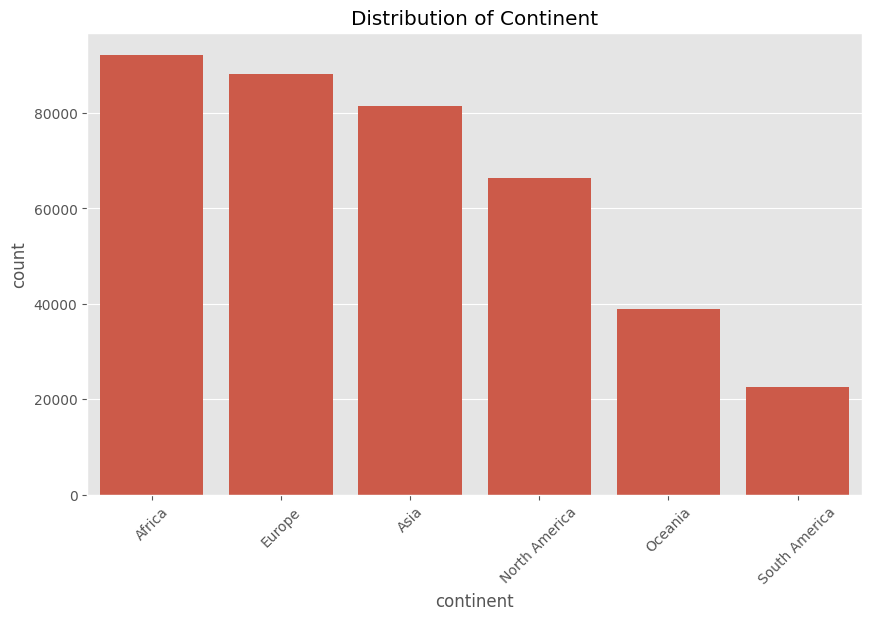

In [21]:
# Plotting the distribution of the continent column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='continent', order=df['continent'].value_counts().index)
plt.title('Distribution of Continent')  
plt.xticks(rotation=45)
plt.show()

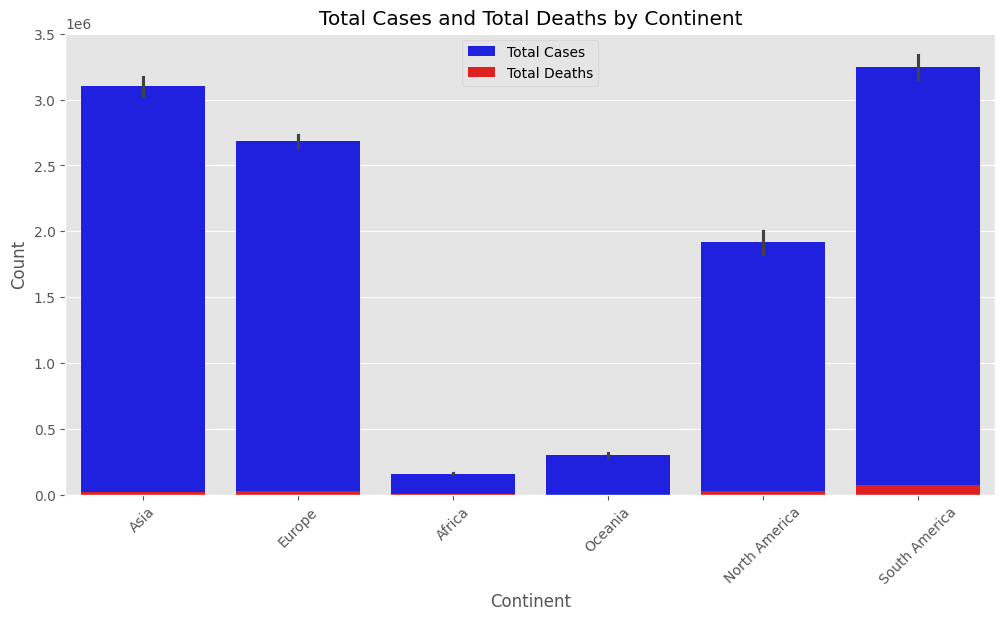

In [25]:
# Plot comparison of total cases and total deaths by continent
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='continent', y='total_cases', color='blue', label='Total Cases')
sns.barplot(data=df, x='continent', y='total_deaths', color='red', label='Total Deaths')
plt.title('Total Cases and Total Deaths by Continent')
plt.xlabel('Continent')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.show()

3. Time Series Analysis

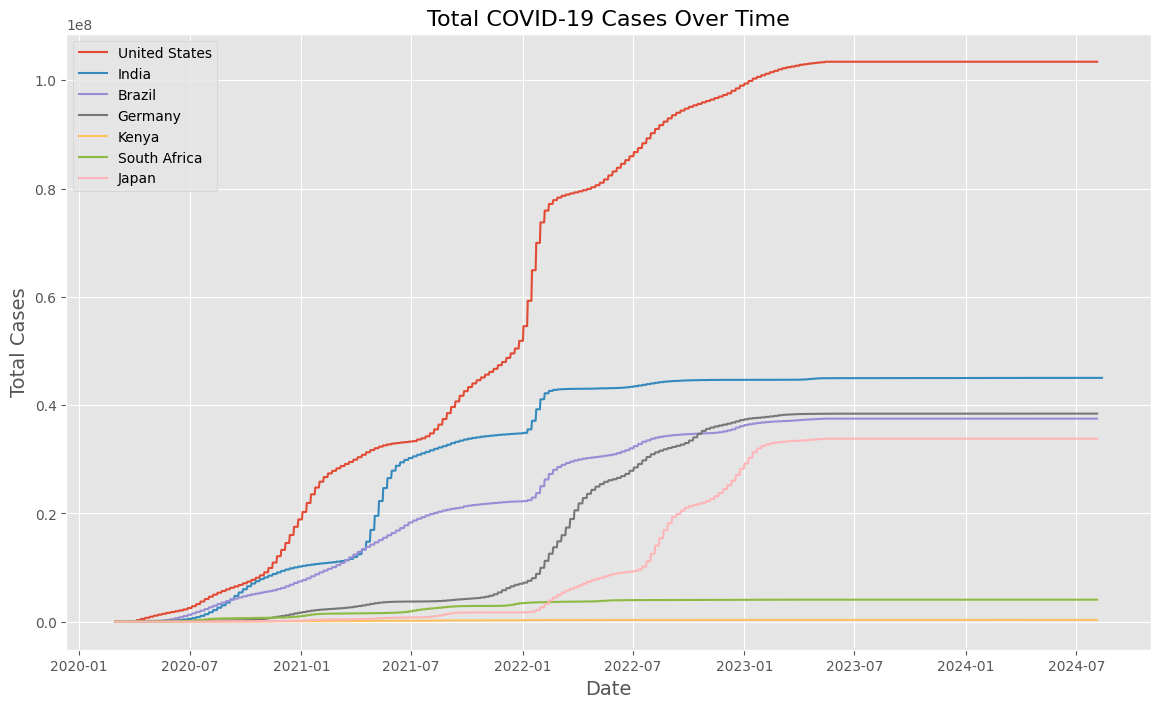

In [22]:
# ## 3. Time Series Analysis
# Select some representative countries for analysis
focus_countries = ['United States', 'India', 'Brazil', 'Germany', 'Kenya', 'South Africa', 'Japan']

# Plot total cases over time for selected countries
if 'total_cases' in df.columns and 'date' in df.columns:
    plt.figure(figsize=(14, 8))
    for country in focus_countries:
        country_data = df[df['location'] == country]
        plt.plot(country_data['date'], country_data['total_cases'], label=country)
    
    plt.title('Total COVID-19 Cases Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Total Cases', fontsize=14)
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Required columns for time series analysis not found.")


# 4. Latest Snapshot Analysis

C:\Users\user\AppData\Local\Temp\ipykernel_7772\3623046642.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='location', data=top_cases, palette='viridis')


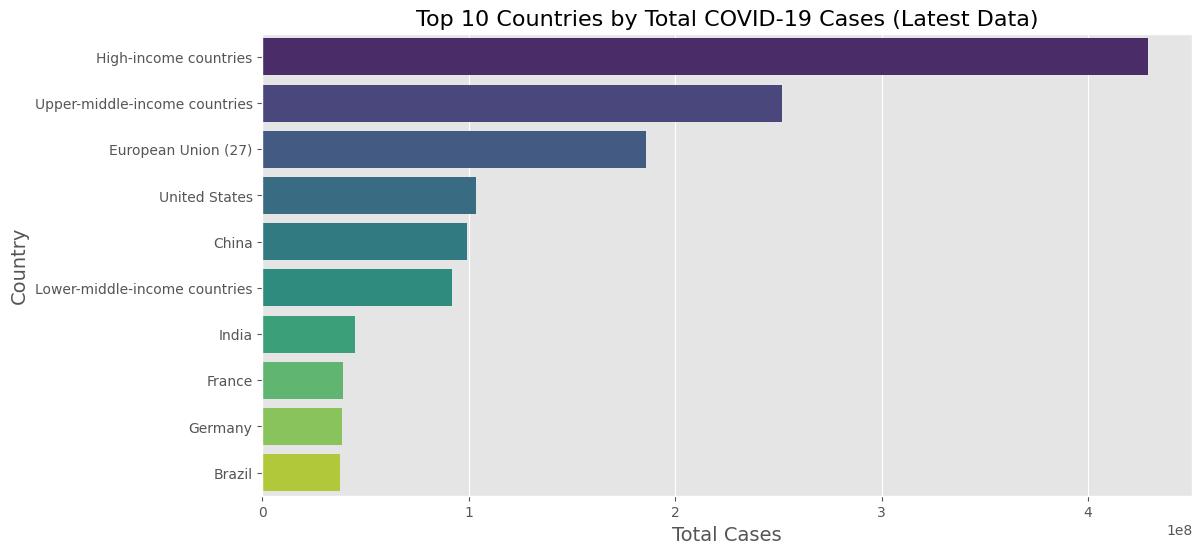

C:\Users\user\AppData\Local\Temp\ipykernel_7772\3623046642.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='pct_vaccinated', y='location', data=vaccinated_df, palette='coolwarm')


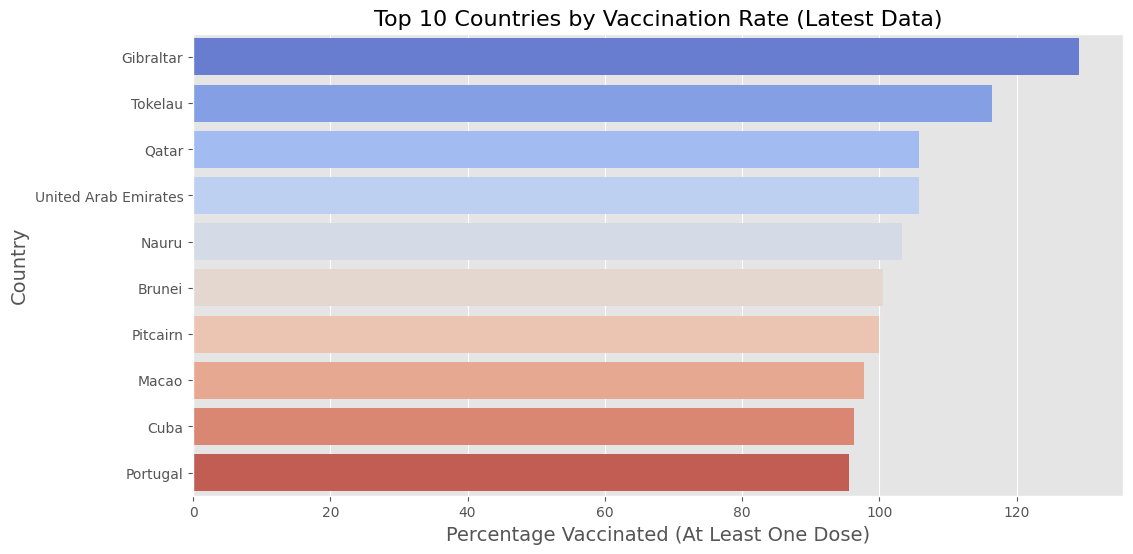

In [23]:
# Get the latest data for each country
if 'date' in df.columns:
    latest_data = df.sort_values('date').groupby('location').last().reset_index()
    
    # Top 10 countries by total cases
    top_cases = latest_data.sort_values('total_cases', ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='total_cases', y='location', data=top_cases, palette='viridis')
    plt.title('Top 10 Countries by Total COVID-19 Cases (Latest Data)', fontsize=16)
    plt.xlabel('Total Cases', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    plt.show()
    
    # Top 10 countries by vaccination rate
    if 'pct_vaccinated' in latest_data.columns:
        vaccinated_df = latest_data[latest_data['people_vaccinated'] > 0].sort_values('pct_vaccinated', ascending=False).head(10)
        plt.figure(figsize=(12, 6))
        sns.barplot(x='pct_vaccinated', y='location', data=vaccinated_df, palette='coolwarm')
        plt.title('Top 10 Countries by Vaccination Rate (Latest Data)', fontsize=16)
        plt.xlabel('Percentage Vaccinated (At Least One Dose)', fontsize=14)
        plt.ylabel('Country', fontsize=14)
        plt.show()


# 5. Geographic Visualizations (Fixed)

In [26]:
# First, let's check what location identifiers we have available
print("Columns available for geographic visualization:")
print(df.columns)
# Since we don't have 'iso_code', we'll use the 'location' column with country names
# Note: This requires the location names to match Plotly's country naming conventions

# Choropleth map of total cases per million
if 'total_cases_per_million' in df.columns and 'location' in df.columns:
    # Get the latest data for each country
    latest_data = df.sort_values('date').groupby('location').last().reset_index()
    
    fig = px.choropleth(latest_data,
                        locations="location",  # Using country names instead of ISO codes
                        locationmode="country names",  # Specify we're using country names
                        color="total_cases_per_million",
                        hover_name="location",
                        hover_data=["total_cases", "total_deaths", "population"],
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title="Total COVID-19 Cases Per Million People (Latest Data)",
                        labels={'total_cases_per_million': 'Cases per million'})
    fig.show()

# Choropleth map of vaccination rates
if 'pct_vaccinated' in df.columns and 'location' in df.columns:
    # Get the latest data for each country
    latest_data = df.sort_values('date').groupby('location').last().reset_index()
    
    fig = px.choropleth(latest_data,
                        locations="location",  # Using country names instead of ISO codes
                        locationmode="country names",  # Specify we're using country names
                        color="pct_vaccinated",
                        hover_name="location",
                        hover_data=["people_vaccinated", "population"],
                        color_continuous_scale=px.colors.sequential.Tealgrn,
                        title="Percentage of Population Vaccinated (At Least One Dose)",
                        labels={'pct_vaccinated': '% Vaccinated'})
    fig.show()


Columns available for geographic visualization:
Index(['date', 'location', 'continent', 'population', 'total_cases',
       'new_cases', 'total_deaths', 'new_deaths', 'total_cases_per_million',
       'total_deaths_per_million', 'total_vaccinations', 'people_vaccinated',
       'people_fully_vaccinated', 'new_vaccinations', 'population_density',
       'median_age', 'gdp_per_capita', 'life_expectancy', 'death_rate',
       'pct_vaccinated'],
      dtype='object')


In [37]:
# Import plotly.graph_objects as go
import plotly.graph_objects as go

# Get latest demographic values per country
country_demo = df.groupby(['location', 'continent', 'iso_code'])[
    ['median_age', 'aged_65_older', 'aged_70_older']
].max().reset_index()

# Define the demographic columns and colorscale
columns = ['median_age', 'aged_65_older', 'aged_70_older']
colorscale = 'Viridis'

# Initialize figure
fig = go.Figure()

# Add a choropleth trace for each demographic column
for i, col in enumerate(columns):
    fig.add_trace(go.Choropleth(
        locations=country_demo['iso_code'],
        z=country_demo[col],
        text=country_demo['location'],
        colorscale=colorscale,
        colorbar_title=col.replace('_', ' ').title(),
        visible=(i == 0),
        name=col
    ))

# Add dropdown slicer at top center
fig.update_layout(
    updatemenus=[{
        'buttons': [
            {
                'label': col.replace('_', ' ').title(),
                'method': 'update',
                'args': [
                    {'visible': [i == j for j in range(len(columns))]},
                    {'coloraxis': {'colorbar': {'title': col.replace('_', ' ').title()}}}
                ]
            }
            for i, col in enumerate(columns)
        ],
        'direction': 'down',
        'showactive': True,
        'x': 0.5,
        'xanchor': 'center',
        'y': 1.15,
        'yanchor': 'top'
    }],
    geo=dict(scope='world'),
    title="Select Demographic Indicator by Country",
    width=1200,
    height=600,
    margin=dict(l=0, r=0, t=80, b=0)
)

fig.show()


# 6. Demographic Analysis

C:\Users\user\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



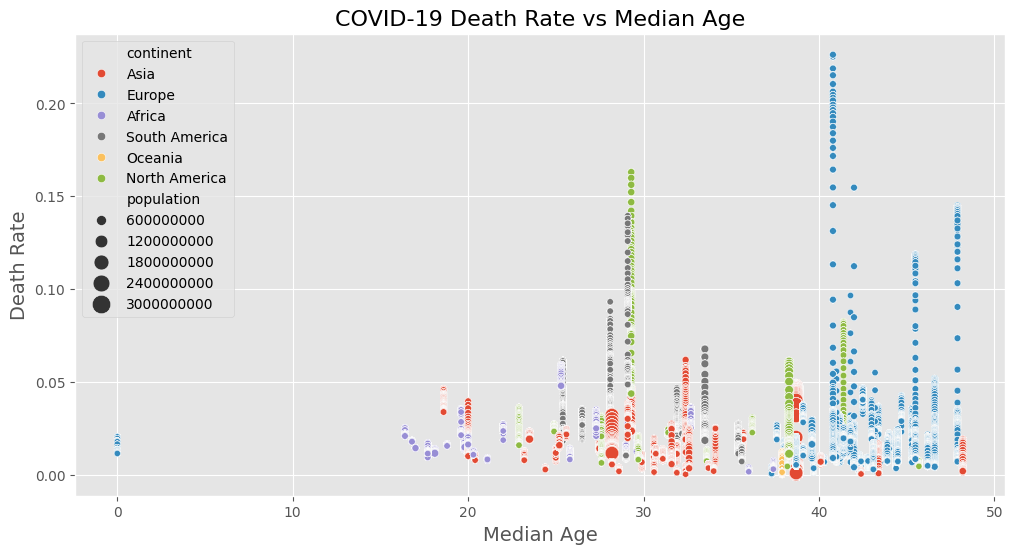

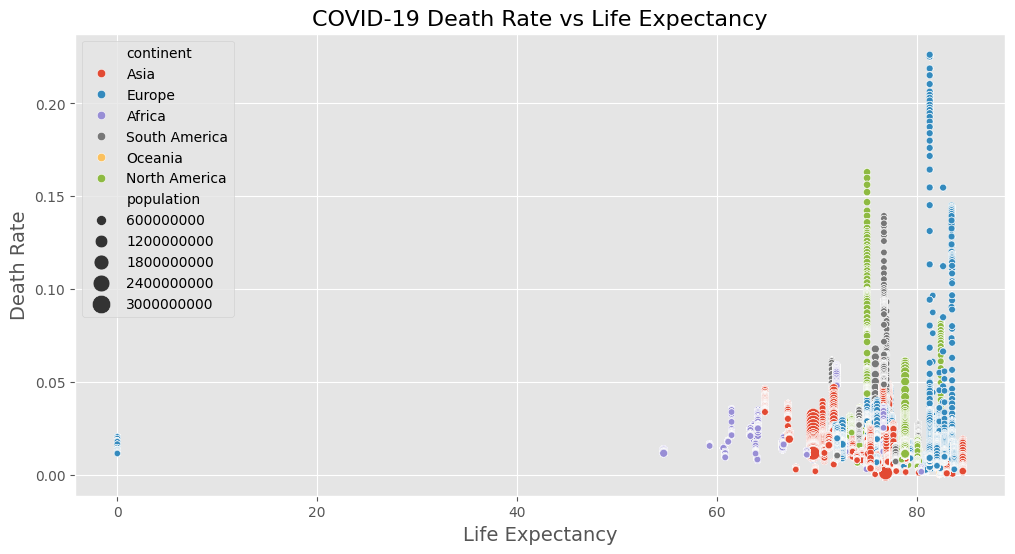

In [27]:
# Relationship between median age and death rate
if 'median_age' in df.columns and 'death_rate' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='median_age', y='death_rate', data=df[df['total_cases'] > 100000], 
                    hue='continent', size='population', sizes=(20, 200))
    plt.title('COVID-19 Death Rate vs Median Age', fontsize=16)
    plt.xlabel('Median Age', fontsize=14)
    plt.ylabel('Death Rate', fontsize=14)
    plt.show()


# Relationship between life expectancy and death rate
if 'life_expectancy' in df.columns and 'death_rate' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='life_expectancy', y='death_rate', data=df[df['total_cases'] > 100000], 
                    hue='continent', size='population', sizes=(20, 200))
    plt.title('COVID-19 Death Rate vs Life Expectancy', fontsize=16)
    plt.xlabel('Life Expectancy', fontsize=14)
    plt.ylabel('Death Rate', fontsize=14)
    plt.show()


## 7. Insights & Key Findings

# ### Key Insights:
# 
# 1. **Case Distribution**: 
#    - The United States, India, and Brazil show the highest total case counts, reflecting their large populations.
#    - When adjusted for population (cases per million), smaller European nations like Andorra and Cyprus show the highest infection rates.
# 
# 2. **Vaccination Progress**:
#    - Developed nations with higher GDP per capita generally show higher vaccination rates.
#    - There's a clear positive correlation between a country's wealth (GDP per capita) and its vaccination rate.
#    - Some smaller nations (like Gibraltar, Malta) show exceptionally high vaccination rates.
# 
# 3. **Death Rates**:
#    - Countries with older populations (higher median age) tend to show higher death rates.
#    - Some countries show unusually high death rates, which may reflect differences in healthcare systems, reporting methods, or testing availability.
# 
# 4. **Regional Patterns**:
#    - European and North American countries generally show higher cases per million.
#    - African nations show lower reported cases but this may reflect testing limitations rather than actual infection rates.
# 
# 5. **Current Status**:
#    - Many countries are showing low or zero new cases/deaths, suggesting the pandemic has transitioned to an endemic phase in these regions.
#    - Vaccination rates vary dramatically between developed and developing nations.

# ### Recommendations:
# 
# 1. **Vaccine Equity**: Continued efforts needed to improve vaccine access in developing nations.
# 2. **Data Transparency**: Improved testing and data reporting in low-income countries would provide better global understanding.
# 3. **Healthcare Investment**: Countries with high death rates should invest in healthcare infrastructure for future pandemics.
# 4. **Ongoing Monitoring**: Continued surveillance is important to track new variants and potential resurgences.

# ## Conclusion
# 
# This analysis provides a snapshot of the global COVID-19 situation based on the latest available data. The visualizations highlight significant disparities in case counts, death rates, and vaccination progress across different countries and regions. The findings underscore the importance of global cooperation in pandemic response and the need for equitable distribution of medical resources.
# 
# Further analysis could incorporate:
# - Time series analysis of recent trends
# - More detailed demographic breakdowns
# - Economic impact assessments
# - Variant-specific data analysis

In [31]:
# Save the cleaned data for future use
df.to_csv('cleaned_latest_covid_data.csv', index=False)

print("Analysis complete. Cleaned data saved to 'cleaned_latest_covid_data.csv'")

Analysis complete. Cleaned data saved to 'cleaned_latest_covid_data.csv'


In [ ]:

import ipywidgets as widgets
from IPython.display import display


# Load and prepare data
df = pd.read_csv('owid-covid-data.csv')
df['date'] = pd.to_datetime(df['date'])

# Calculate vaccination percentages
df['pct_vaccinated'] = (df['people_vaccinated'] / df['population']) * 100
df['pct_fully_vaccinated'] = (df['people_fully_vaccinated'] / df['population']) * 100

# Create a function to plot vaccination data
def plot_vaccination(countries, chart_type, start_date, end_date):
    plt.figure(figsize=(14, 8))
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)
    
    filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    
    if chart_type == "Line Chart":
        # LINE CHART: Vaccination Progress Over Time
        for country in countries:
            country_data = filtered_data[filtered_data['location'] == country]
            if not country_data.empty:
                plt.plot(country_data['date'], country_data['pct_vaccinated'], 
                        label=f'{country} - At least one dose')
                plt.plot(country_data['date'], country_data['pct_fully_vaccinated'], 
                        label=f'{country} - Fully vaccinated', linestyle='--')
        
        plt.title('Vaccination Progress Over Time')
        plt.ylabel('Percentage of Population')
        plt.legend()
        plt.grid(True)
    
    elif chart_type == "Bar Chart":
        # BAR CHART: Latest vaccination percentages
        latest_data = filtered_data.groupby('location').last().reset_index()
        
        width = 0.35
        x = range(len(countries))
        
        for i, country in enumerate(countries):
            country_data = latest_data[latest_data['location'] == country]
            if not country_data.empty:
                plt.bar(i-width/2, country_data['pct_vaccinated'].values[0], width, 
                       label=f'{country} - At least one dose', color='tab:blue')
                plt.bar(i+width/2, country_data['pct_fully_vaccinated'].values[0], width, 
                       label=f'{country} - Fully vaccinated', color='tab:orange')
        
        plt.xticks(x, countries)
        plt.title('Latest Vaccination Percentage Comparison')
        plt.ylabel('Percentage of Population')
        plt.legend()
        plt.grid(True)
    
    elif chart_type == "Pie Chart":
        # PIE CHART: Vaccination status for one country
        if len(countries) == 1:
            country = countries[0]
            latest = filtered_data[filtered_data['location'] == country].iloc[-1]
            
            vaccinated = latest['pct_vaccinated']
            fully_vaccinated = latest['pct_fully_vaccinated']
            unvaccinated = 100 - vaccinated
            
            sizes = [fully_vaccinated, vaccinated-fully_vaccinated, unvaccinated]
            labels = ['Fully Vaccinated', 'Partially Vaccinated', 'Unvaccinated']
            colors = ['#2ca02c', '#ff7f0e', '#d62728']
            
            plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                   startangle=90, wedgeprops={'edgecolor': 'white'})
            plt.title(f'Vaccination Status: {country}\n({latest["date"].date()})')
        else:
            print("Pie chart can only show one country at a time")
            return
    
    plt.tight_layout()
    plt.show()

# Widget setup
countries = sorted(df['location'].unique())
min_date = df['date'].min().date()
max_date = df['date'].max().date()

# Create widgets
country_select = widgets.SelectMultiple(
    options=countries,
    value=['United States', 'United Kingdom', 'Germany'],
    description='Countries:',
    layout={'width': '300px'}
)

chart_type_select = widgets.RadioButtons(
    options=['Line Chart', 'Bar Chart', 'Pie Chart'],
    value='Line Chart',
    description='Chart Type:'
)

start_date_picker = widgets.DatePicker(
    value=min_date,
    min=min_date,
    max=max_date,
    description='Start Date:',
    disabled=False
)

end_date_picker = widgets.DatePicker(
    value=max_date,
    min=min_date,
    max=max_date,
    description='End Date:',
    disabled=False
)

# Create interactive output
out = widgets.interactive_output(
    plot_vaccination,
    {
        'countries': country_select,
        'chart_type': chart_type_select,
        'start_date': start_date_picker,
        'end_date': end_date_picker
    }
)

# Display widgets in an organized layout
controls = widgets.VBox([
    widgets.HBox([country_select, chart_type_select]),
    widgets.HBox([start_date_picker, end_date_picker])
])

display(widgets.VBox([controls, out]))


Hospitalization Data Available:


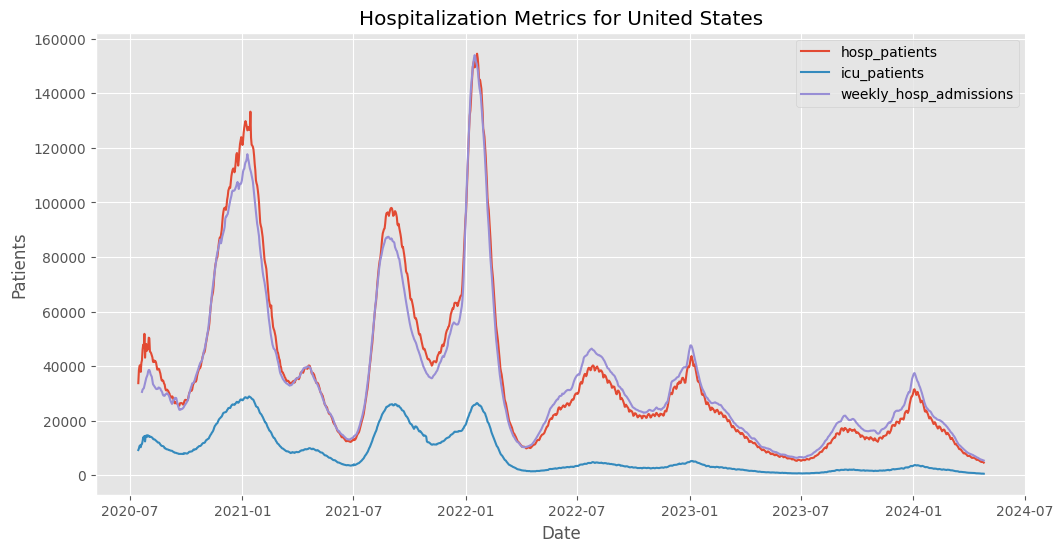

In [34]:
# Check for hospitalization metrics
hospitalization_metrics = ['hosp_patients', 'icu_patients', 'weekly_hosp_admissions']
available_metrics = [m for m in hospitalization_metrics if m in df.columns]

if available_metrics:
    print("\nHospitalization Data Available:")
    
    # Plot hospitalization data for a specific country
    country = "United States"  # or use interactive widget
    hosp_data = df[df['location'] == country]
    
    plt.figure(figsize=(12, 6))
    for metric in available_metrics:
        plt.plot(hosp_data['date'], hosp_data[metric], label=metric)
    
    plt.title(f'Hospitalization Metrics for {country}')
    plt.xlabel('Date')
    plt.ylabel('Patients')
    plt.legend()
    plt.show()
else:
    print("No hospitalization data available in this dataset")

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file
with PdfPages('covid_analysis_report.pdf') as pdf:
    # Example plot
    plt.figure(figsize=(10, 6))
    sns.histplot(df['new_cases'], bins=50)
    plt.title('Distribution of New COVID-19 Cases')
    pdf.savefig()  # saves the current figure into the PDF
    plt.close()
    
print("Analysis report saved as 'covid_analysis_report.pdf'")
# End of the analysis

Analysis report saved as 'covid_analysis_report.pdf'
